In [13]:
import openmc
%matplotlib notebook
import matplotlib.pyplot as plt
import os
import numpy as np
import pickle
import socket
import re

CLUSTER = re.findall('cluster', socket.gethostname())
import sens_helpers
from sens_helpers.plotting import plot_source, plot_adjoint, plot_all_sens, plot_xs_sens, get_tallies_from_dir, hist_y

In [2]:
# sens_folder = '/home/icmeyer/research/wmp_sensitivity_problems/problems/pu-sol-therm-034-015/sensitivity_run'
Ts = [0, 1, 150, 273, 600, 900, 1200, 1500, 2000]
sens_Ts = {}
use_pickle = True
pickle_name = 'pu_T_sens.pkl'
if use_pickle:
    with open(pickl_name, 'rb') as f:
    sens_Ts = pickle.load(f)
else:
    if CLUSTER:
        problem_dir = '/home/icmeyer/wmp_sensitivity_problems/problems/'
    else:
        problem_dir = '/home/icmeyer/research/wmp_sensitivity_problems/problems/'
    for T in Ts:
        print('reading ', T)
        path = problem_dir + 'pu-sol-therm-034-015/{:d}/sensitivity_run/'.format(T)
        sens_Ts[T] = get_tallies_from_dir(path)
    with open(pickle_name, 'wb') as f:
        pickle.dump(sens_Ts, f)
    

H1 multipole none
H1 curve_fit none
H1 cross_section fission
H1 cross_section absorption
H1 cross_section elastic
O16 multipole none
O16 curve_fit none
O16 cross_section fission
O16 cross_section absorption
O16 cross_section elastic
O17 multipole none
O17 curve_fit none
O17 cross_section fission
O17 cross_section absorption
O17 cross_section elastic
Fe54 multipole none
Fe54 curve_fit none
Fe54 cross_section fission
Fe54 cross_section absorption
Fe54 cross_section elastic
Fe56 multipole none
Fe56 curve_fit none
Fe56 cross_section fission
Fe56 cross_section absorption
Fe56 cross_section elastic
Fe57 multipole none
Fe57 curve_fit none
Fe57 cross_section fission
Fe57 cross_section absorption
Fe57 cross_section elastic
Fe58 multipole none
Fe58 curve_fit none
Fe58 cross_section fission
Fe58 cross_section absorption
Fe58 cross_section elastic
Cr50 multipole none
Cr50 curve_fit none
Cr50 cross_section fission
Cr50 cross_section absorption
Cr50 cross_section elastic
Cr52 multipole none
Cr52 cur

Cr53 cross_section elastic
Cr54 multipole none
Cr54 curve_fit none
Cr54 cross_section fission
Cr54 cross_section absorption
Cr54 cross_section elastic
Ni58 multipole none
Ni58 curve_fit none
Ni58 cross_section fission
Ni58 cross_section absorption
Ni58 cross_section elastic
Ni60 multipole none
Ni60 curve_fit none
Ni60 cross_section fission
Ni60 cross_section absorption
Ni60 cross_section elastic
Ni61 multipole none
Ni61 curve_fit none
Ni61 cross_section fission
Ni61 cross_section absorption
Ni61 cross_section elastic
Ni62 multipole none
Ni62 curve_fit none
Ni62 cross_section fission
Ni62 cross_section absorption
Ni62 cross_section elastic
Ni64 multipole none
Ni64 curve_fit none
Ni64 cross_section fission
Ni64 cross_section absorption
Ni64 cross_section elastic
Gd152 multipole none
Gd152 curve_fit none
Gd152 cross_section fission
Gd152 cross_section absorption
Gd152 cross_section elastic
Gd154 multipole none
Gd154 curve_fit none
Gd154 cross_section fission
Gd154 cross_section absorption

Gd156 curve_fit none
Gd156 cross_section fission
Gd156 cross_section absorption
Gd156 cross_section elastic
Gd157 multipole none
Gd157 curve_fit none
Gd157 cross_section fission
Gd157 cross_section absorption
Gd157 cross_section elastic
Gd158 multipole none
Gd158 curve_fit none
Gd158 cross_section fission
Gd158 cross_section absorption
Gd158 cross_section elastic
Gd160 multipole none
Gd160 curve_fit none
Gd160 cross_section fission
Gd160 cross_section absorption
Gd160 cross_section elastic
Pu238 multipole none
Pu238 curve_fit none
Pu238 cross_section fission
Pu238 cross_section absorption
Pu238 cross_section elastic
Pu239 multipole none
Pu239 curve_fit none
Pu239 cross_section fission
Pu239 cross_section absorption
Pu239 cross_section elastic
Pu240 multipole none
Pu240 curve_fit none
Pu240 cross_section fission
Pu240 cross_section absorption
Pu240 cross_section elastic
Pu241 multipole none
Pu241 curve_fit none
Pu241 cross_section fission
Pu241 cross_section absorption
Pu241 cross_secti

H1 cross_section elastic
O16 multipole none
O16 curve_fit none
O16 cross_section fission
O16 cross_section absorption
O16 cross_section elastic
O17 multipole none
O17 curve_fit none
O17 cross_section fission
O17 cross_section absorption
O17 cross_section elastic
Fe54 multipole none
Fe54 curve_fit none
Fe54 cross_section fission
Fe54 cross_section absorption
Fe54 cross_section elastic
Fe56 multipole none
Fe56 curve_fit none
Fe56 cross_section fission
Fe56 cross_section absorption
Fe56 cross_section elastic
Fe57 multipole none
Fe57 curve_fit none
Fe57 cross_section fission
Fe57 cross_section absorption
Fe57 cross_section elastic
Fe58 multipole none
Fe58 curve_fit none
Fe58 cross_section fission
Fe58 cross_section absorption
Fe58 cross_section elastic
Cr50 multipole none
Cr50 curve_fit none
Cr50 cross_section fission
Cr50 cross_section absorption
Cr50 cross_section elastic
Cr52 multipole none
Cr52 curve_fit none
Cr52 cross_section fission
Cr52 cross_section absorption
Cr52 cross_section e

<IPython.core.display.Javascript object>


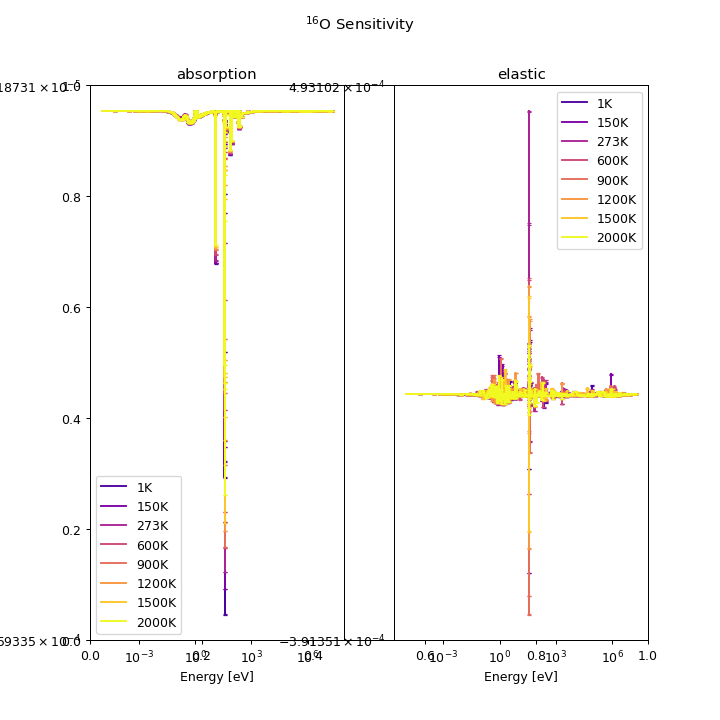

In [18]:
def plot_sens_err(ax, e_bins, sens, sens_sd=None, label='', color='b'):
    mids = (e_bins[:-1] + e_bins[1:])/2
    step = ax.step(e_bins, hist_y(sens), label=label, color=color)
    if sens_sd is not None:
        ax.errorbar(mids, sens, yerr=sens_sd, capsize=2, 
                    capthick=1, fmt=' ', color=step[0].get_color())

        
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
var = 'cross_section'
# rxns = ['fission', 'absorption', 'elastic']
rxns = ['absorption', 'elastic']
reaction = 'absorption'
nuc = 'Gd152'
nr = len(rxns)
nT = len(Ts)
colors = plt.cm.plasma(np.linspace(0,1,nT))

for r, reaction in enumerate(rxns):
    ax = fig.add_subplot(1, nr, r+1)
    for t, T in enumerate(Ts):
        e_bins = sens_Ts[T][nuc][var][reaction]['energy']
        if len(e_bins)>1:
            sens = sens_Ts[T][nuc][var][reaction]['mean']
            sens = sens/(np.log(e_bins[1:]) - np.log(e_bins[:-1]))
            sd = sens_Ts[T][nuc][var][reaction]['sd']
            # plot_sens_err(ax, e_bins, sens, sens_sd=sd, normalize=True, label=str(T))
            plot_sens_err(ax, e_bins, sens, sens_sd=sd, label=str(T)+'K', color=colors[t])
    ax.set_yscale('symlog')
    ax.set_xscale('log')
    if r==0:
        ax.set_ylabel('Sensitivy Per Unit Lethargy')
    ax.set_xlabel('Energy [eV]')

    ax.legend()
    ax.set_title(reaction)
fig.suptitle(nuc)
plt.show()

In [ ]:
plot = openmc.Plot()
# Along z-axis
plot.basis = 'xy'
plot.origin = (0, 0, 70)
plot.width = (100., 100.)
plot.pixels = (400, 400)
plot.to_ipython_image()

In [ ]:
plot = openmc.Plot()
# Along x-axis
plot.basis = 'yz'
plot.origin = (0, 0, 70)
plot.width = (200., 200.)
plot.pixels = (400, 400)
plot.to_ipython_image()

In [ ]:
plot = openmc.Plot()
# Along y-axis
plot.basis = 'xz'
plot.origin = (21.59, 0, 70)
plot.width = (200., 200.)
plot.pixels = (400, 400)
plot.to_ipython_image()

In [ ]:
from sens_helpers.plotting import plot_source
source_figs = plot_source(is2D)
for fig in source_figs:
    fig.show()

In [ ]:
adjoint_figs = plot_adjoint(is2D)
for fig in adjoint_figs:
    fig.show()

In [ ]:
rxns = ['fission', 'absorption', 'elastic']
var_words = ['cross_section', 'multipole', 'curve_fit']
nuclides = sens_helpers.openmc_help.get_nucs_from_mat_xml('materials.xml')
figs = plot_all_sens(nuclides, rxns, var_words)
for fig in figs:
    fig.show()
